In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Downloads/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1. Find out how many males and females participated in the test.

In [8]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

It is clear that more females has participated the test than males.

# 2. What do you think about the students' parental level of education?

In [9]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

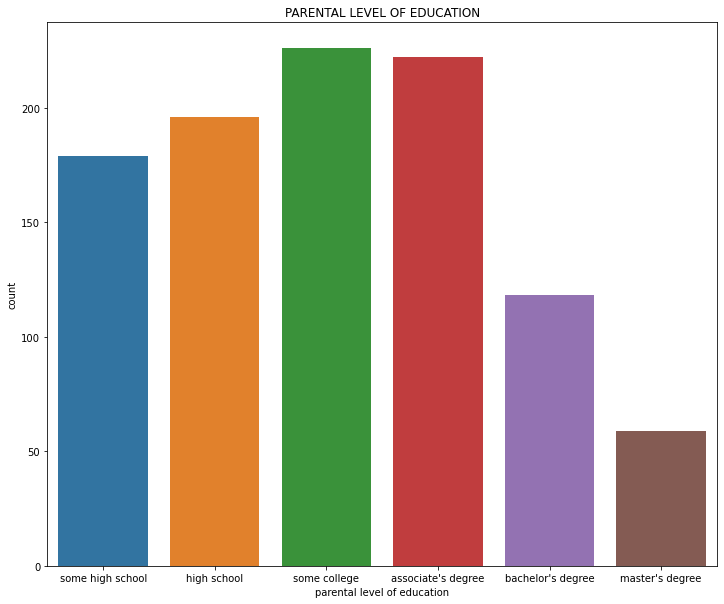

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(x='parental level of education',data=df)
plt.title('PARENTAL LEVEL OF EDUCATION')
plt.show()

Majority of the parents have done their education upto high school and colleges , but only some as a bachelor's degree and few as a master's degree.

# 3. Who scores the most on average for math, reading and writing based on

# ● Gender

In [20]:
mean_math_score=df.groupby('gender', as_index=False)['math score'].mean()
mean_math_score.sort_values("math score",ascending=False)

,gender,math score
1,male,68.821577
0,female,63.376448


Males has more average on math score than females.

In [21]:
mean_reading_score=df.groupby('gender', as_index=False)['reading score'].mean()
mean_reading_score.sort_values("reading score",ascending=False)

,gender,reading score
0,female,72.590734
1,male,65.545643


Females has more average reading score than males.

In [22]:
mean_writing_score=df.groupby('gender', as_index=False)['writing score'].mean()
mean_writing_score.sort_values("writing score",ascending=False)

,gender,writing score
0,female,72.467181
1,male,63.446058


Females has more average writing score than males.

THUS WE CAN MAKE A CONCLUSION THAT FEMALES HAS BETTER SCORE IN READING AND WRITING THAN MALES AND MALES HAVE A BETTER SCORE IN MATH THAN FEMALES.

# ● Test preparation course

In [26]:
df.groupby('test preparation course',as_index=False)[['math score','reading score','writing score']].mean()

,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


It is clear that the average is more for those students who has completed the test preparation course than the students who does not have a test preparation course.

# 4. What do you think about the scoring variation for math, reading and writing based on


# ● Gender

In [28]:
df.groupby('gender',as_index=False)[['math score','reading score','writing score']].var()

,gender,math score,reading score,writing score
0,female,256.958593,207.677438,220.369327
1,male,211.889097,200.211010,202.413924


Females has a more scoring variation than males in math,reading and writing score

# ● Test preparation course

In [29]:
df.groupby('test preparation course',as_index=False)[['math score','reading score','writing score']].var()

,test preparation course,math score,reading score,writing score
0,completed,210.884027,183.265864,175.202612
1,none,246.668662,213.419851,226.251739


Those who have not done the test preparation has more score variation than those who completed in math,reading and writing score.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score , so how will you help the management to achieve this.


In [30]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [35]:
math_score=df['math score']
math_score=math_score[math_score>=77]
math_score.count()

255

Those who score marks more than or equal to 77 in math are eligible for the bonus points.There are a total of 255 students who got above or equal to 77 marks in math.